# Data Analysis Notebook

In [8]:
import os
import glob
import pickle
import pandas as pd
import matplotlib
import numpy as np

In [36]:
import matplotlib.pyplot as plt

In [179]:

def savedict(file_path, dict_name):
    """Save dictionary dict_name to file_path"""
    with open(file_path, 'wb') as file:
        pickle.dump(dict_name, file)
        print(f"The data dictionary has been saved to {file_path}.")

In [302]:
matplotlib.rc_file_defaults() 

In [303]:
# settings for plotting
# Figure properties\
tick_width = 2
tick_length = 8
matplotlib.rcParams['axes.linewidth'] = 2.5
matplotlib.rcParams['savefig.transparent'] = False
matplotlib.rcParams['figure.autolayout'] = False
matplotlib.rcParams['figure.constrained_layout.use'] = False
matplotlib.rcParams['axes.unicode_minus'] = False # using small minus sign (i.e. hypen-minus) and not the default unicode minus
matplotlib.rcParams["font.weight"] = "bold"
matplotlib.rcParams["axes.labelweight"] = "bold"
matplotlib.rcParams["axes.linewidth"] = 2.0
matplotlib.rcParams["axes.labelsize"] = 20
matplotlib.rcParams['savefig.dpi'] = 300

In [23]:
### Local Import
import sys
package_path = '/home/Lakehouse/DreamBrookPy'
if package_path not in sys.path:
    sys.path.append(package_path)
import DreamBrookPy.MachineLearning as ML
import DreamBrookPy.DataChef as DC

2024-02-17 12:59:02.683400: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
# Get list of files available on result folder

# Specify the directory to search for .pkl files
directory_path = '/home/Lakehouse/Competition/Ocean_Metar_19Feb/results'

# Use glob to find all .pkl files in the directory
pkl_files = glob.glob(os.path.join(directory_path, '*.pkl'))

# Extract just the names of the files, without the full path
file_names = [os.path.basename(file) for file in pkl_files]

In [5]:
# Dataset_1 : For initialization of analysis 
def dataset_loader(filedir,dataset_list):
    """
    Load a datalist
    """
    loaded_dataset={}
    for d in dataset_list :
        filepath = f'{filedir}/{d}'
        data_name = d[:-4]#
        with open(filepath, 'rb') as file:
            dataset = pickle.load(file)
        new_data = {data_name: dataset}
        loaded_dataset.update(new_data)
    return loaded_dataset

In [24]:
import seaborn as sns
def plot_pearson_heatmap(matrix_data,label_list, vmin, vmax, cmap ='magma', annot = True, width= 10, height = 8, cbar_args = None):
    """
    plotting function for pearson heatmap
    
    """
    sns.set_theme() # use sns theme
    fig = plt.figure(figsize = (width,height))
    #fig,ax =plt.subplots(figsize = (width,height))
    # cax = inset_axes(ax,
    #              width="10%",  # width: 40% of parent_bbox width
    #              height="100%",  # height: 10% of parent_bbox height
    #              loc='right',
    #              bbox_to_anchor=(1.1, 1, 0, 0),
    #              bbox_transform=ax.transAxes,
    #              borderpad=0,
    #              )
    ax =sns.heatmap(matrix_data ,cmap = cmap, annot=annot, xticklabels=label_list,
        yticklabels=label_list, vmin =vmin, vmax = vmax, cbar_kws=cbar_args)
    #matplotlib.rc_file_defaults() # return back to matplotlib default
    return fig , ax 

# Data Preprocessing 1 

In [ ]:
# Load Raw METAR.txt


In [327]:
final_dict= raw_METAR_data
cloud_cover_df = preprocess_cloud_height(final_dict)

In [328]:
cloud_cover_df.head()

,cloud_layer_1_height,cloud_layer_1_type,cloud_layer_2_height,cloud_layer_2_type,cloud_layer_3_height,cloud_layer_3_type,cloud_layer_4_height,cloud_layer_4_type
0,2500.0,8,0,0,0,0,0,0
1,2300.0,8,0,0,0,0,0,0
2,2500.0,8,0,0,0,0,0,0
3,2800.0,8,0,0,0,0,0,0
4,2800.0,8,0,0,0,0,0,0


In [ ]:
# Re Produce the  Full_Cleaned_METAR_dict [Starting Material to work with]
# include the boolean Wind, Etc too

In [347]:
filepath = '../results/Full_Cleaned_METAR_dict.pkl' 
with open(filepath, 'rb') as file:
    raw_METAR_data = pickle.load(file)

In [10]:
## Add boolean wind_var
wind_min_var = raw_METAR_data['wind_min_ver']
wind_max_var = raw_METAR_data['wind_max_var']
wind_min_var_s = pd.Series(wind_min_var)
bool_wind_min_var = wind_min_var_s.notnull().astype(int)
wind_max_var_s = pd.Series(wind_max_var)
bool_wind_max_var = wind_max_var_s.notnull().astype(int)

In [335]:
new_data = {'cleaned_wind_min_var':cleaned_wind_min_var,
            'cleaned_wind_max_var':cleaned_wind_max_var,}

In [336]:
extra_METAR_data = {**updated_METAR,**new_data}

In [337]:
extra_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure', 'bool_wind_min_var', 'bool_wind_max_var', 'wind_mind_var', 'cloud_layers_df', 'cleaned_wind_min_var', 'cleaned_wind_max_var'])

In [338]:
file_path = '../results/Full_Cleaned_METAR_dict.pkl'  # Specify the file path and name

# Save the dictionary into a binary file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(extra_METAR_data, file)
print(f"The data has been saved to {file_path}.")

The data has been saved to ../results/Full_Cleaned_METAR_dict.pkl.


In [329]:
new_data = {'cloud_layers_df': cloud_cover_df}

In [331]:
updated_METAR = {**extra_METAR_data,**new_data}

In [333]:
file_path = '../results/Full_Cleaned_METAR_dict.pkl'  # Specify the file path and name

# Save the dictionary into a binary file using pickle
with open(file_path, 'wb') as file:
    pickle.dump(updated_METAR, file)
print(f"The data has been saved to {file_path}.")

The data has been saved to ../results/Full_Cleaned_METAR_dict.pkl.


In [370]:
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure', 'bool_wind_min_var', 'bool_wind_max_var', 'wind_mind_var', 'cloud_layers_df', 'cleaned_wind_min_var', 'cleaned_wind_max_var'])

In [350]:
raw_METAR_data['cloud_layers_df'].columns

Index(['cloud_layer_1_height', 'cloud_layer_1_type', 'cloud_layer_2_height',
       'cloud_layer_2_type', 'cloud_layer_3_height', 'cloud_layer_3_type',
       'cloud_layer_4_height', 'cloud_layer_4_type'],
      dtype='object')

In [351]:
cloud_cover_ave = raw_METAR_data['cloud_layers_df'][['cloud_layer_1_type','cloud_layer_2_type',
                                                    'cloud_layer_3_type','cloud_layer_4_type']]

In [355]:
cloud_cover_data = cloud_cover_ave.sum(axis=1)
cloud_cover_full_df = pd.concat([cloud_cover_data,raw_METAR_data['hour']],axis=1)

In [356]:
cloud_cover_full_df

,0,1
0,8,0
1,8,1
2,8,2
3,8,3
4,8,4
...,...,...
89446,1,19
89447,1,20
89448,1,21
89449,0,22


In [16]:
year = raw_METAR_data['year']
month = raw_METAR_data['month']
day = raw_METAR_data['day']
hour = raw_METAR_data['hour']
minute = raw_METAR_data['minute']

In [17]:
cleaned_wind_min_var = pd.Series(wind_min_var).fillna(0).infer_objects()
cleaned_wind_max_var = pd.Series(wind_max_var).fillna(0).infer_objects()

In [334]:
cleaned_wind_min_var

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
89446    0.0
89447    0.0
89448    0.0
89449    0.0
89450    0.0
Length: 89451, dtype: float64

In [18]:
# Create a metar_df 
degree_data =raw_METAR_data['wind_degrees']
speed_data = raw_METAR_data['wind_speed']
vis_data =raw_METAR_data['visibility_distance']
n_cloud_data = raw_METAR_data['n_cloud_layers']
cloud_1_height_data = pd.Series(raw_METAR_data['clouds_1_layer']['layer_1']['height'])
temperature_data =raw_METAR_data['temperature']
dew_data =raw_METAR_data['dew']
air_pressure_data =raw_METAR_data['air_pressure']

In [19]:
METAR_df_core = pd.concat([degree_data,speed_data, cleaned_wind_min_var, 
                           cleaned_wind_max_var,vis_data,n_cloud_data,
                           temperature_data,dew_data,air_pressure_data],axis=1)
METAR_df_core.columns =['degree', 'speed','wind_min_var','wind_max_var',
                        'visibility','n_cloud_layers','temperature','dew_data', 'air_pressure']

In [ ]:
## Cloud Type here . 

In [ ]:
METAR_df_core.head()

In [20]:
METAR_df_full = pd.concat([year,month,day,hour,minute,METAR_df_core],axis=1)
METAR_df_full.columns =['year','month','day','hour','minute','degree', 'speed','wind_min_var','wind_max_var',
                        'visibility','n_cloud_layers','temperature','dew_data', 'air_pressure']

In [21]:
METAR_df_full.to_csv('../results/METAR_df_full.csv')
METAR_df_core.to_csv('../results/METAR_df_core.csv')

In [160]:
# pcorr matrix  based on df_core 
pcorr_matrix = DC.calc_pearson_coefficient(METAR_df_core)
pcorr_matrix_df = pd.DataFrame(pcorr_matrix)

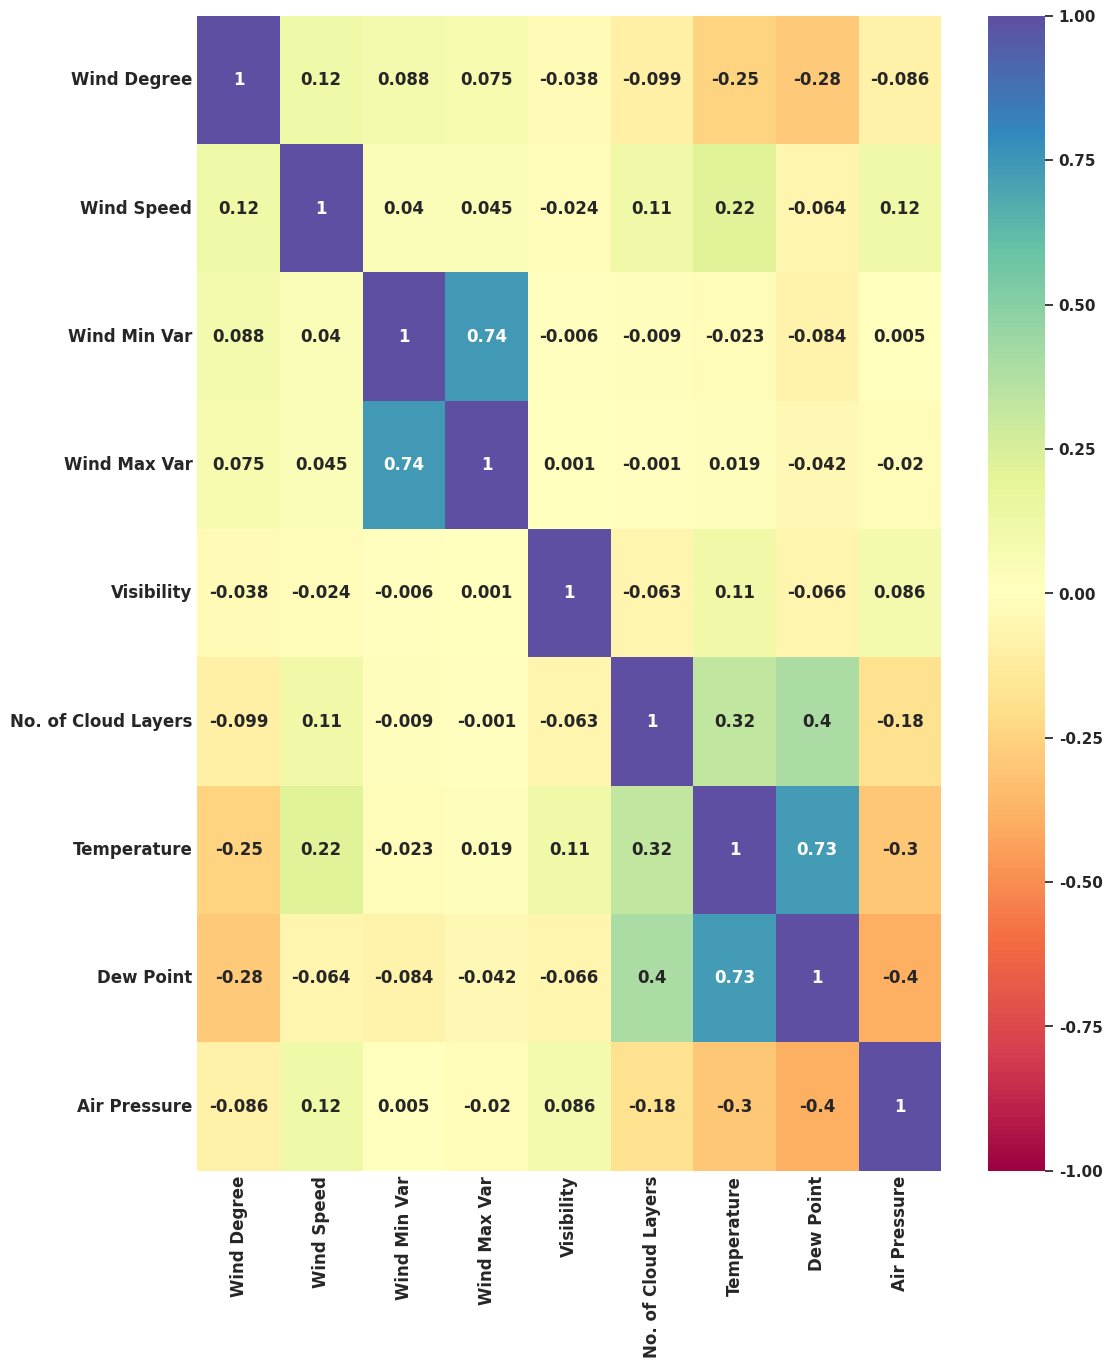

In [173]:
the_data = pcorr_matrix_df
label_props = ['Wind Degree','Wind Speed','Wind Min Var','Wind Max Var',
               'Visibility','No. of Cloud Layers','Temperature','Dew Point','Air Pressure']
fig, ax = plot_pearson_heatmap(the_data,label_props, vmin = -1, vmax = 1, cmap = 'Spectral',
                                    annot=True, width =12, height =15)
ax.tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
fig.savefig('../results/Heatmap.png',dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

In [ ]:
# make some illustration of the available data and what processes been done here

In [45]:
from sklearn.preprocessing import StandardScaler

In [44]:
# Data for dimension reduction : 
from sklearn.decomposition import PCA 

In [ ]:
METAR_df_core

In [46]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(METAR_df_core)

In [47]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_scaled)

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=pca_results, columns=['PC1', 'PC2'])

In [48]:
df_pca

,PC1,PC2
0,1.417446,-0.569717
1,1.417446,-0.569717
2,1.441601,-0.558562
3,1.611439,-0.516867
4,1.251869,-0.451052
...,...,...
89446,3.512873,-0.574544
89447,3.446752,-0.501848
89448,3.537028,-0.563390
89449,4.132297,-0.723055


In [276]:
# Featurization 
temp_df = METAR_df_core.drop(['wind_min_var', 'wind_max_var'],axis =1)
feature_df = pd.concat([temp_df,cloud_type_df,df_pca],axis =1)
feature_df['cloud_type']= feature_df['cloud_type'].fillna(0)

In [270]:
cloud_type_df = pd.DataFrame(cloud_type_series.fillna(0).infer_objects())
cloud_type_df.columns = ['cloud_type']

In [265]:
METAR_df_core.columns

Index(['degree', 'speed', 'wind_min_var', 'wind_max_var', 'visibility',
       'n_cloud_layers', 'temperature', 'dew_data', 'air_pressure'],
      dtype='object')

In [277]:
feature_df

,degree,speed,visibility,n_cloud_layers,temperature,dew_data,air_pressure,cloud_type,PC1,PC2
0,40.0,9,10.0,1,23.0,18.0,1023.0,8.0,1.417446,-0.569717
1,40.0,9,10.0,1,23.0,18.0,1023.0,8.0,1.417446,-0.569717
2,50.0,9,10.0,1,23.0,18.0,1023.0,8.0,1.441601,-0.558562
3,70.0,10,10.0,1,23.0,17.0,1023.0,8.0,1.611439,-0.516867
4,70.0,10,10.0,1,24.0,18.0,1022.0,8.0,1.251869,-0.451052
...,...,...,...,...,...,...,...,...,...,...
89446,280.0,4,10.0,1,21.0,8.0,1022.0,0.0,3.512873,-0.574544
89447,310.0,5,10.0,1,21.0,9.0,1022.0,0.0,3.446752,-0.501848
89448,290.0,4,10.0,1,21.0,8.0,1022.0,0.0,3.537028,-0.563390
89449,290.0,4,10.0,0,19.0,9.0,1023.0,0.0,4.132297,-0.723055


In [278]:
feature_df.to_csv('../results/feature_df.csv')

In [279]:
# pcorr matrix  based on df_core 
pcorr_matrix = DC.calc_pearson_coefficient(feature_df)
pcorr_matrix_df = pd.DataFrame(pcorr_matrix)

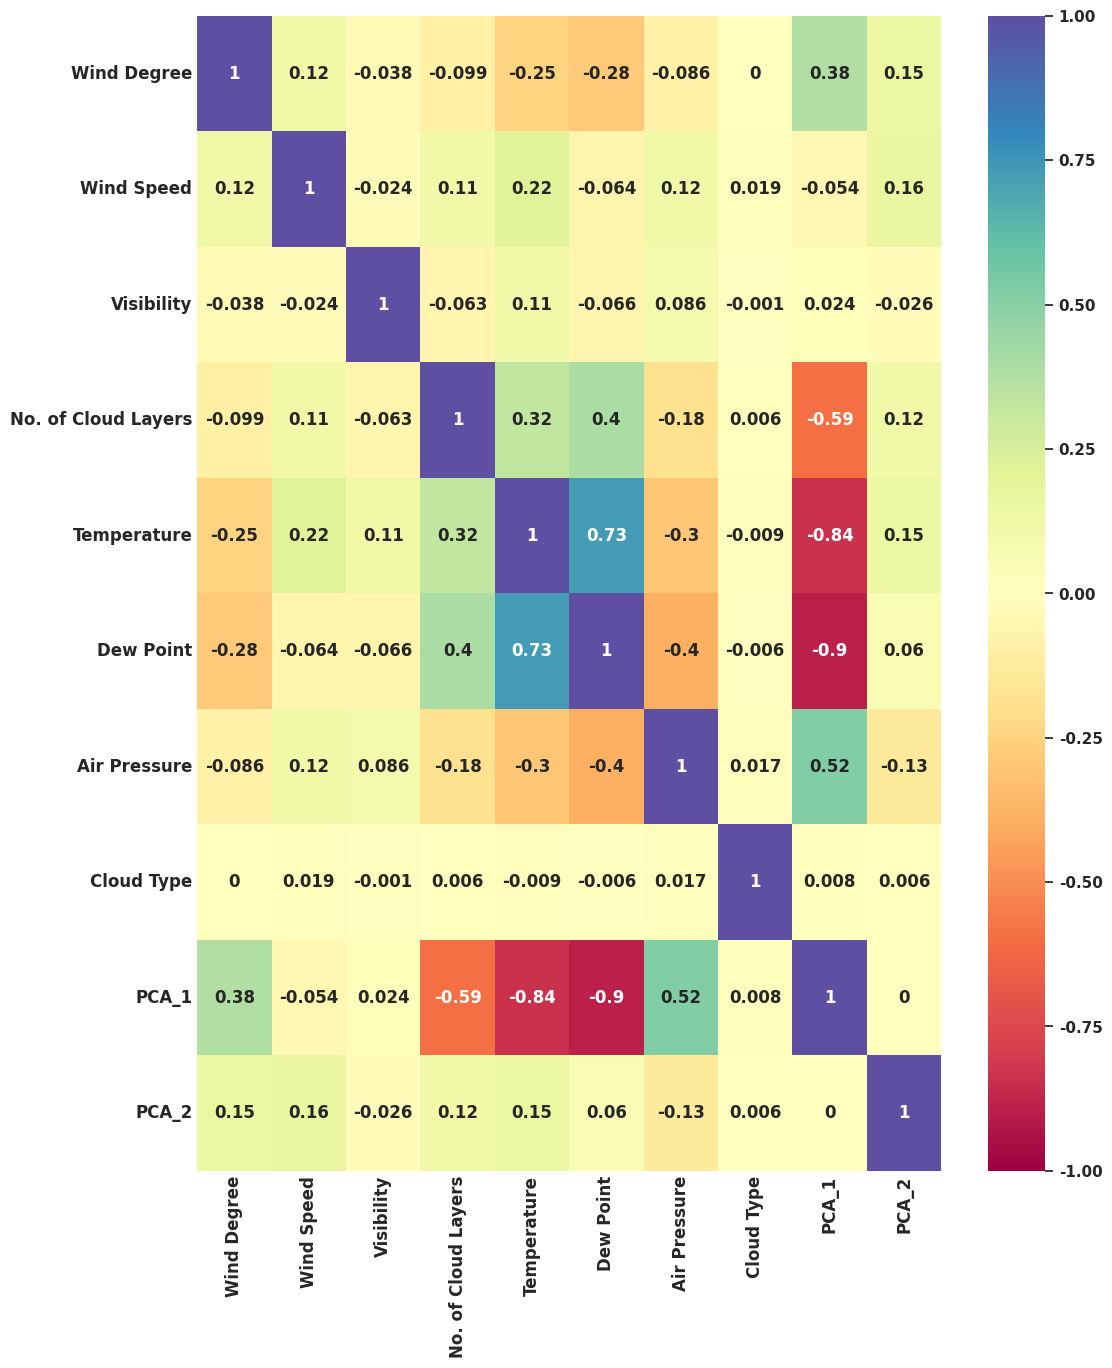

In [345]:
the_data = pcorr_matrix_df
label_props = ['Wind Degree','Wind Speed','Visibility','No. of Cloud Layers','Temperature','Dew Point',
               'Air Pressure','Cloud Type', 'PCA_1', 'PCA_2']
fig, ax = plot_pearson_heatmap(the_data,label_props, vmin = -1, vmax = 1, cmap = 'Spectral',
                                    annot=True, width =12, height =15)
ax.tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
fig.savefig('../results/Feature_Heatmap.png',dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

In [ ]:
# Do data analysis on month or yearly basis

In [53]:
METAR_df_full.head()

,year,month,day,hour,minute,degree,speed,wind_min_var,wind_max_var,visibility,n_cloud_layers,temperature,dew_data,air_pressure
0,2014.0,1.0,1.0,0.0,53.0,40.0,9.0,0.0,0.0,10.0,1.0,23.0,18.0,1023.0
1,2014.0,1.0,1.0,1.0,53.0,40.0,9.0,0.0,0.0,10.0,1.0,23.0,18.0,1023.0
2,2014.0,1.0,1.0,2.0,53.0,50.0,9.0,0.0,0.0,10.0,1.0,23.0,18.0,1023.0
3,2014.0,1.0,1.0,3.0,53.0,70.0,10.0,0.0,0.0,10.0,1.0,23.0,17.0,1023.0
4,2014.0,1.0,1.0,4.0,53.0,70.0,10.0,0.0,0.0,10.0,1.0,24.0,18.0,1022.0


In [54]:
df = METAR_df_full
df_by_month = {month: group for month, group in df.groupby('month')}
df_by_year = {year: group for year, group in df.groupby('year')}

In [281]:
df_by_hour = {hour: group for hour, group in df.groupby('hour')}

In [306]:
file_path  = f'../results/METAR_df_by_hour.pkl' 
dict_name = df_by_hour
savedict(file_path, dict_name)

The data dictionary has been saved to ../results/METAR_df_by_hour.pkl.


In [288]:
hour_index = list(pd.Series(df_by_hour.keys()).astype(int))

In [291]:
df_by_hour[0.0]

,year,month,day,hour,minute,degree,speed,wind_min_var,wind_max_var,visibility,n_cloud_layers,temperature,dew_data,air_pressure
0,2014.0,1.0,1.0,0.0,53.0,40.0,9.0,0.0,0.0,10.0,1.0,23.0,18.0,1023.0
24,2014.0,1.0,2.0,0.0,53.0,110.0,6.0,0.0,0.0,10.0,2.0,24.0,22.0,1018.0
48,2014.0,1.0,3.0,0.0,53.0,230.0,5.0,0.0,0.0,10.0,1.0,24.0,19.0,1014.0
72,2014.0,1.0,4.0,0.0,53.0,360.0,5.0,0.0,0.0,10.0,2.0,17.0,11.0,1020.0
96,2014.0,1.0,5.0,0.0,53.0,80.0,6.0,0.0,0.0,10.0,3.0,23.0,19.0,1019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84139,NaN,NaN,NaN,0.0,53.0,160.0,7.0,0.0,0.0,10.0,1.0,31.0,24.0,1014.0
84327,NaN,NaN,NaN,0.0,53.0,140.0,6.0,0.0,0.0,10.0,3.0,29.0,26.0,1016.0
86286,NaN,NaN,NaN,0.0,53.0,40.0,9.0,0.0,0.0,10.0,2.0,29.0,22.0,1015.0
86772,NaN,NaN,NaN,0.0,53.0,0.0,0.0,0.0,0.0,10.0,4.0,27.0,24.0,1014.0


In [181]:
file_path  = f'../results/METAR_df_by_year.pkl' 
dict_name = df_by_year
savedict(file_path, dict_name)

The data dictionary has been saved to ../results/METAR_df_by_year.pkl.


In [206]:
a = df_by_month[1.0].describe().temperature

In [212]:
df_by_month[1.0].describe()

,year,month,day,hour,minute,degree,speed,wind_min_var,wind_max_var,visibility,n_cloud_layers,temperature,dew_data,air_pressure
count,7525.000000,7525.0,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000,7525.000000
mean,2018.572359,1.0,16.049568,11.498472,52.540731,176.413422,6.614485,4.349502,3.303654,9.706757,1.894751,20.808372,14.978339,1018.965847
std,2.880157,0.0,8.944573,6.917291,3.964133,120.716770,4.124115,34.423831,29.323561,1.258282,1.060293,4.398142,5.486578,3.996879
min,2014.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-7.000000,1000.000000
25%,2016.000000,1.0,8.000000,5.000000,53.000000,80.000000,4.000000,0.000000,0.000000,10.000000,1.000000,18.000000,12.000000,1016.000000
50%,2019.000000,1.0,16.000000,12.000000,53.000000,140.000000,6.000000,0.000000,0.000000,10.000000,2.000000,22.000000,16.000000,1019.000000
75%,2021.000000,1.0,24.000000,17.000000,53.000000,310.000000,9.000000,0.000000,0.000000,10.000000,3.000000,24.000000,19.000000,1022.000000
max,2023.000000,1.0,31.000000,23.000000,58.000000,360.000000,26.000000,360.000000,360.000000,10.000000,5.000000,31.000000,23.000000,1033.000000


In [ ]:
# Create Statistic data based on 
# wind Speed Temperature, dew,  temperature, mean and std
# by months and year. 

In [311]:
year_list = list(df_by_year.keys())
temp_mean_list = []
temp_std_list = []

speed_mean_list = []
speed_std_list = []

dew_mean_list = []
dew_std_list = []

cloud_mean_list =[]
cloud_std_list =[]
for i in year_list:
    data_des = df_by_year[i].describe()
    
    temp = data_des.temperature
    temp_mean = temp['mean']
    temp_std = temp['std']
    temp_mean_list.append(temp_mean)
    temp_std_list.append(temp_std)

    speed = data_des.speed
    speed_mean = speed['mean']
    speed_std = speed['std']
    speed_mean_list.append(speed_mean)
    speed_std_list.append(speed_std)

    dew = data_des.dew_data
    dew_mean = dew['mean']
    dew_std = dew['std']
    dew_mean_list.append(dew_mean)
    dew_std_list.append(dew_std)

    cloud = data_des.n_cloud_layers
    cloud_mean = cloud['mean']
    cloud_std = cloud['std']
    cloud_mean_list.append(cloud_mean)
    cloud_std_list.append(cloud_std)

yearly_ave_df = pd.DataFrame({
    'temp_ave':temp_mean_list,
    'temp_std':temp_std_list,
     'speed_ave':speed_mean_list,
    'speed_std':speed_std_list,
     'dew_ave':dew_mean_list,
    'dew_std':dew_std_list,
      'cloud_ave':cloud_mean_list,
    'cloud_std':cloud_std_list,
})

yearly_ave_df.index= [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

    
    

In [312]:
month_list = list(df_by_month.keys())
temp_mean_list = []
temp_std_list = []

speed_mean_list = []
speed_std_list = []

dew_mean_list = []
dew_std_list = []

cloud_mean_list =[]
cloud_std_list =[]
for i in month_list:
    data_des = df_by_month[i].describe()
    
    temp = data_des.temperature
    temp_mean = temp['mean']
    temp_std = temp['std']
    temp_mean_list.append(temp_mean)
    temp_std_list.append(temp_std)

    speed = data_des.speed
    speed_mean = speed['mean']
    speed_std = speed['std']
    speed_mean_list.append(speed_mean)
    speed_std_list.append(speed_std)

    dew = data_des.dew_data
    dew_mean = dew['mean']
    dew_std = dew['std']
    dew_mean_list.append(dew_mean)
    dew_std_list.append(dew_std)

    cloud = data_des.n_cloud_layers
    cloud_mean = cloud['mean']
    cloud_std = cloud['std']
    cloud_mean_list.append(cloud_mean)
    cloud_std_list.append(cloud_std)

monthly_ave_df = pd.DataFrame({
    'temp_ave':temp_mean_list,
    'temp_std':temp_std_list,
     'speed_ave':speed_mean_list,
    'speed_std':speed_std_list,
     'dew_ave':dew_mean_list,
    'dew_std':dew_std_list,
      'cloud_ave':cloud_mean_list,
    'cloud_std':cloud_std_list,
})

monthly_ave_df.index= [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

    
    

In [307]:
hour_list = list(df_by_hour.keys())
temp_mean_list = []
temp_std_list = []

speed_mean_list = []
speed_std_list = []

dew_mean_list = []
dew_std_list = []

cloud_mean_list =[]
cloud_std_list =[]

for i in hour_list:
    data_des = df_by_hour[i].describe()
    
    temp = data_des.temperature
    temp_mean = temp['mean']
    temp_std = temp['std']
    temp_mean_list.append(temp_mean)
    temp_std_list.append(temp_std)

    speed = data_des.speed
    speed_mean = speed['mean']
    speed_std = speed['std']
    speed_mean_list.append(speed_mean)
    speed_std_list.append(speed_std)

    dew = data_des.dew_data
    dew_mean = dew['mean']
    dew_std = dew['std']
    dew_mean_list.append(dew_mean)
    dew_std_list.append(dew_std)

    cloud = data_des.n_cloud_layers
    cloud_mean = cloud['mean']
    cloud_std = cloud['std']
    cloud_mean_list.append(cloud_mean)
    cloud_std_list.append(cloud_std)



hour_ave_df = pd.DataFrame({
    'temp_ave':temp_mean_list,
    'temp_std':temp_std_list,
     'speed_ave':speed_mean_list,
    'speed_std':speed_std_list,
     'dew_ave':dew_mean_list,
    'dew_std':dew_std_list,
    'cloud_ave':cloud_mean_list,
    'cloud_std':cloud_std_list,
})

hour_ave_df.index= hour_index

    
    

In [295]:
hour_ave_df

,temp_ave,temp_std,speed_ave,speed_std,dew_ave,dew_std
0,25.388394,3.245037,6.506613,3.389257,20.036167,4.422025
1,25.102488,3.330426,6.123851,3.598578,20.105462,4.415800
2,24.840238,3.431332,5.737341,3.635819,20.148660,4.459623
3,24.577850,3.524518,5.496615,3.734093,20.163011,4.466678
4,24.315605,3.607613,5.129320,3.797574,20.197624,4.461354
5,24.051192,3.723050,4.883532,3.754954,20.179036,4.452971
6,23.817100,3.782531,4.610119,3.733083,20.184794,4.474035
7,23.602751,3.867228,4.398867,3.654084,20.181230,4.483589
8,23.477052,3.923452,4.289417,3.626713,20.149838,4.517671
9,23.388048,3.980346,4.138183,3.530170,20.115468,4.569770


In [218]:
yearly_ave_df.index= [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]

In [261]:
yearly_ave_df

,temp_ave,temp_std,speed_ave,speed_std,dew_ave,dew_std
2014,25.015169,4.256110,6.147208,4.021898,19.224661,4.750599
2015,25.897950,3.844397,6.760279,4.086679,20.227122,4.311850
2016,25.336219,4.138609,6.856378,4.051804,19.502506,4.949235
2017,25.908332,4.205437,6.908218,4.343968,19.853012,4.705101
2018,25.166076,4.163206,6.951847,4.220023,20.246483,5.035357
2019,25.851458,4.180347,6.730360,4.141595,19.945569,3.862784
2020,26.007650,4.206290,7.227906,4.377435,20.191368,4.941952
2021,25.486048,3.939731,6.543230,4.151506,20.129003,4.441191
2022,25.723152,4.128442,6.716560,4.144289,20.589393,4.176075
2023,26.244552,3.928999,6.208022,4.125568,20.482472,3.898748


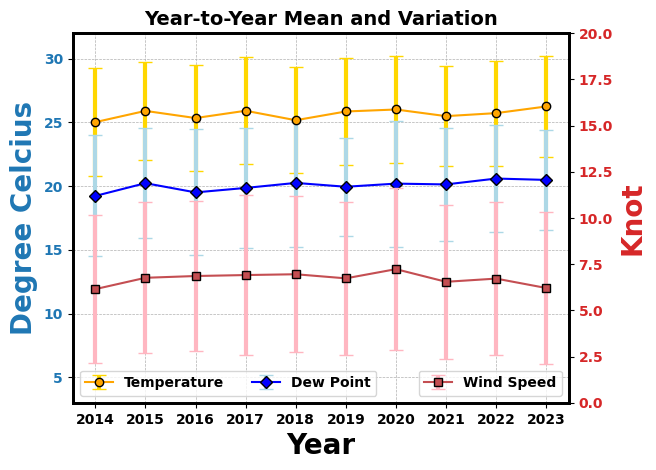

In [251]:
# Plotting
# Create the first plot
fig, ax1 = plt.subplots()

ax1.errorbar(yearly_ave_df.index, yearly_ave_df['temp_ave'], yerr=yearly_ave_df['temp_std'], capsize=5, 
             linestyle='-', marker='o', color='orange', ecolor='gold', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1,label ='Temperature')

ax1.errorbar(yearly_ave_df.index, yearly_ave_df['dew_ave'], yerr=yearly_ave_df['dew_std'], capsize=5, 
             linestyle='-', marker='D', color='blue', ecolor='lightblue', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1, label ='Dew Point')
color = 'tab:blue'

ax1.set_ylabel('Degree Celcius', color=color)
ax1.set_xlabel('Year')
ax1.set_xticks(yearly_ave_df.index)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(3,32)
ax1.legend(frameon=True,facecolor='white',loc='lower left',ncols=2)
# Create a twin of the first axis to share the same x-axis
ax2 = ax1.twinx()  
ax2.errorbar(yearly_ave_df.index, yearly_ave_df['speed_ave'], yerr=yearly_ave_df['speed_std'], capsize=5, 
             linestyle='-', marker='s', color='r', ecolor='lightpink', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1,label ='Wind Speed')
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Knot', color=color)
ax2.set_ylim(0,20)
ax2.legend(frameon=True,facecolor='white',loc='lower right')

plt.title('Year-to-Year Mean and Variation', fontsize=14, fontweight='bold')

plt.show()


fig.savefig('../results/yearly_ave.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

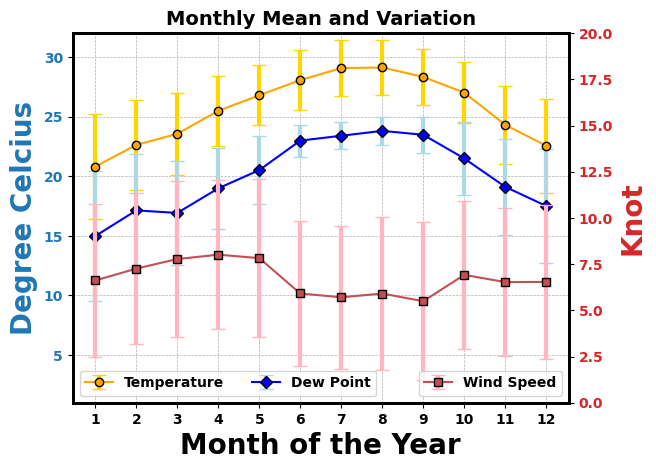

In [260]:
# Plotting
# Create the first plot
fig, ax1 = plt.subplots()

ax1.errorbar(monthly_ave_df.index, monthly_ave_df['temp_ave'], yerr=monthly_ave_df['temp_std'], capsize=5, 
             linestyle='-', marker='o', color='orange', ecolor='gold', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1,label ='Temperature')

ax1.errorbar(monthly_ave_df.index, monthly_ave_df['dew_ave'], yerr=monthly_ave_df['dew_std'], capsize=5, 
             linestyle='-', marker='D', color='blue', ecolor='lightblue', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1, label ='Dew Point')
color = 'tab:blue'

ax1.set_ylabel('Degree Celcius', color=color)
ax1.set_xlabel('Month of the Year')
ax1.set_xticks(monthly_ave_df.index)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(1,32)
ax1.legend(frameon=True,facecolor='white',loc='lower left',ncols=2)
# Create a twin of the first axis to share the same x-axis
ax2 = ax1.twinx()  
ax2.errorbar(monthly_ave_df.index, monthly_ave_df['speed_ave'], yerr=monthly_ave_df['speed_std'], capsize=5, 
             linestyle='-', marker='s', color='r', ecolor='lightpink', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1,label ='Wind Speed')
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Knot', color=color)
ax2.set_ylim(0,20)
ax2.legend(frameon=True,facecolor='white',loc='lower right')

plt.title('Monthly Mean and Variation', fontsize=14, fontweight='bold')

plt.show()


fig.savefig('../results/monthly_ave.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

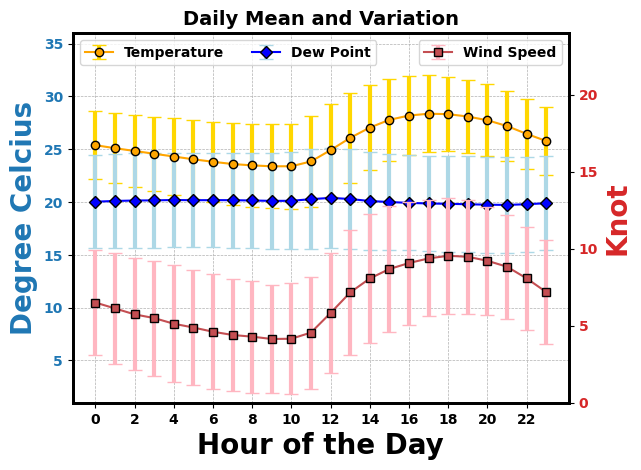

In [344]:
# Plotting
# Create the first plot
fig, ax1 = plt.subplots()

ax1.errorbar(hour_ave_df.index, hour_ave_df['temp_ave'], yerr=hour_ave_df['temp_std'], capsize=5, 
             linestyle='-', marker='o', color='orange', ecolor='gold', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1,label ='Temperature')

ax1.errorbar(hour_ave_df.index, hour_ave_df['dew_ave'], yerr=hour_ave_df['dew_std'], capsize=5, 
             linestyle='-', marker='D', color='blue', ecolor='lightblue', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1, label ='Dew Point')
color = 'tab:blue'

ax1.set_ylabel('Degree Celcius', color=color)
ax1.set_xlabel('Hour of the Day')
ax1.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22])
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(1,36)
ax1.legend(frameon=True,facecolor='white',loc='upper left',ncols=2)
# Create a twin of the first axis to share the same x-axis
ax2 = ax1.twinx()  
ax2.errorbar(hour_ave_df.index, hour_ave_df['speed_ave'], yerr=hour_ave_df['speed_std'], capsize=5, 
             linestyle='-', marker='s', color='r', ecolor='lightpink', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1,label ='Wind Speed')
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylabel('Knot', color=color)
ax2.set_ylim(0,24)
ax2.legend(frameon=True,facecolor='white',loc='upper right')

plt.title('Daily Mean and Variation', fontsize=14, fontweight='bold')

plt.show()


fig.savefig('../results/daily_ave.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

In [ ]:
# Daily Cloud Coverage and profile

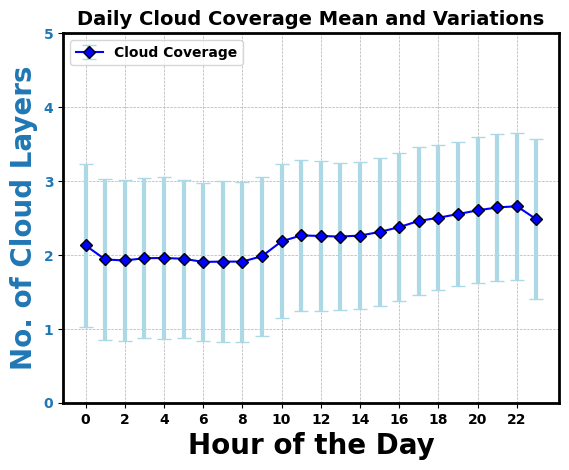

In [323]:
# Plotting
# Create the first plot
fig, ax1 = plt.subplots()


ax1.errorbar(hour_ave_df.index, hour_ave_df['cloud_ave'], yerr=hour_ave_df['cloud_std'], capsize=5, 
             linestyle='-', marker='D', color='blue', ecolor='lightblue', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1, label ='Cloud Coverage')
color = 'tab:blue'

ax1.set_ylabel('No. of Cloud Layers', color=color)
ax1.set_xlabel('Hour of the Day')
ax1.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22])
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,5)
ax1.legend(frameon=True,facecolor='white',loc='upper left',ncols=2)


plt.title('Daily Cloud Coverage Mean and Variations', fontsize=14, fontweight='bold')

plt.show()


fig.savefig('../results/daily_cloud_layers.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

In [357]:
cloud_cover_full_df.columns =['cloud_cover','hour']

In [362]:
cloud_cover_full_df_by_hour = {hour: group for hour, group in cloud_cover_full_df.groupby('hour')}

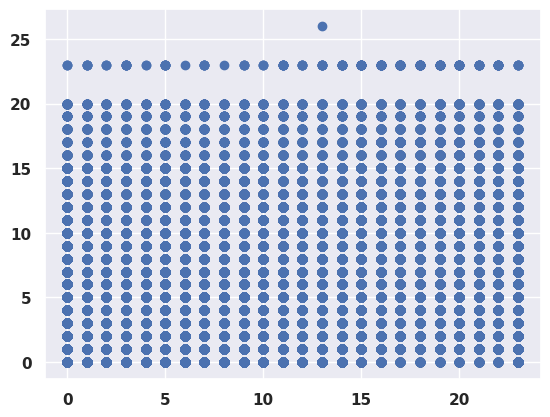

In [368]:
plt.scatter(cloud_cover_full_df['hour'],cloud_cover_full_df['cloud_cover'])

AttributeError: 'dict' object has no attribute 'index'

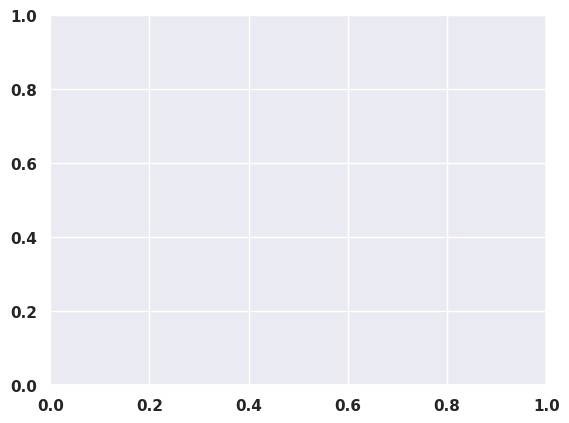

In [364]:
# Plotting ### Nead to average over the different layers 
# Create the first plot
fig, ax1 = plt.subplots()


ax1.errorbar(cloud_cover_full_df_by_hour.index, cloud_cover_full_df_by_hour['cloud_cover'], capsize=5, 
             linestyle='-', marker='D', color='blue', ecolor='lightblue', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1, label ='Cloud Coverage')
color = 'tab:blue'

ax1.set_ylabel('Cloud Coverage (Octas)', color=color)
ax1.set_xlabel('Hour of the Day')
ax1.set_xticks([0,2,4,6,8,10,12,14,16,18,20,22])
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,5)
ax1.legend(frameon=True,facecolor='white',loc='upper left',ncols=2)


plt.title('Daily Cloud Coverage Mean and Variations', fontsize=14, fontweight='bold')

plt.show()


fig.savefig('../results/daily_cloud_cover.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

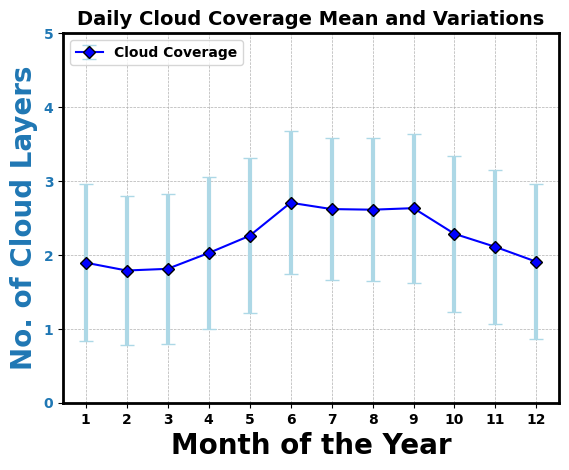

In [324]:
# Plotting
# Create the first plot
fig, ax1 = plt.subplots()


ax1.errorbar(monthly_ave_df.index, monthly_ave_df['cloud_ave'], yerr=monthly_ave_df['cloud_std'], capsize=5, 
             linestyle='-', marker='D', color='blue', ecolor='lightblue', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1, label ='Cloud Coverage')
color = 'tab:blue'

ax1.set_ylabel('No. of Cloud Layers', color=color)
ax1.set_xlabel('Month of the Year')
ax1.set_xticks(monthly_ave_df.index)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,5)
ax1.legend(frameon=True,facecolor='white',loc='upper left',ncols=2)


plt.title('Daily Cloud Coverage Mean and Variations', fontsize=14, fontweight='bold')

plt.show()


fig.savefig('../results/monthly_cloud_layers.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

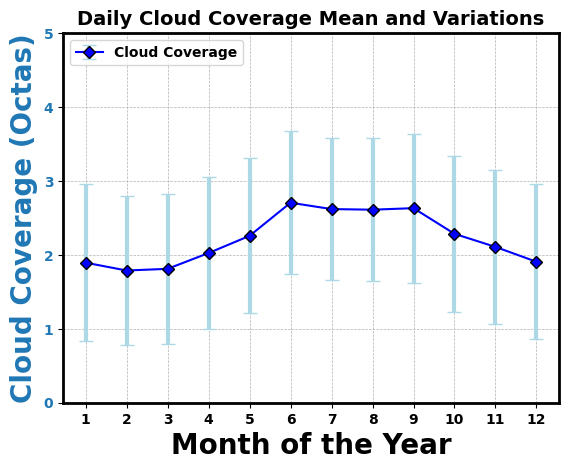

In [322]:
# Plotting
# Create the first plot
fig, ax1 = plt.subplots()


ax1.errorbar(monthly_ave_df.index, monthly_ave_df['cloud_ave'], yerr=monthly_ave_df['cloud_std'], capsize=5, 
             linestyle='-', marker='D', color='blue', ecolor='lightblue', elinewidth=3, 
             markeredgecolor='black', markeredgewidth=1, label ='Cloud Coverage')
color = 'tab:blue'

ax1.set_ylabel('Cloud Coverage (Octas)', color=color)
ax1.set_xlabel('Month of the Year')
ax1.set_xticks(monthly_ave_df.index)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(0,5)
ax1.legend(frameon=True,facecolor='white',loc='upper left',ncols=2)


plt.title('Daily Cloud Coverage Mean and Variations', fontsize=14, fontweight='bold')

plt.show()


fig.savefig('../results/monthly_cloud.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

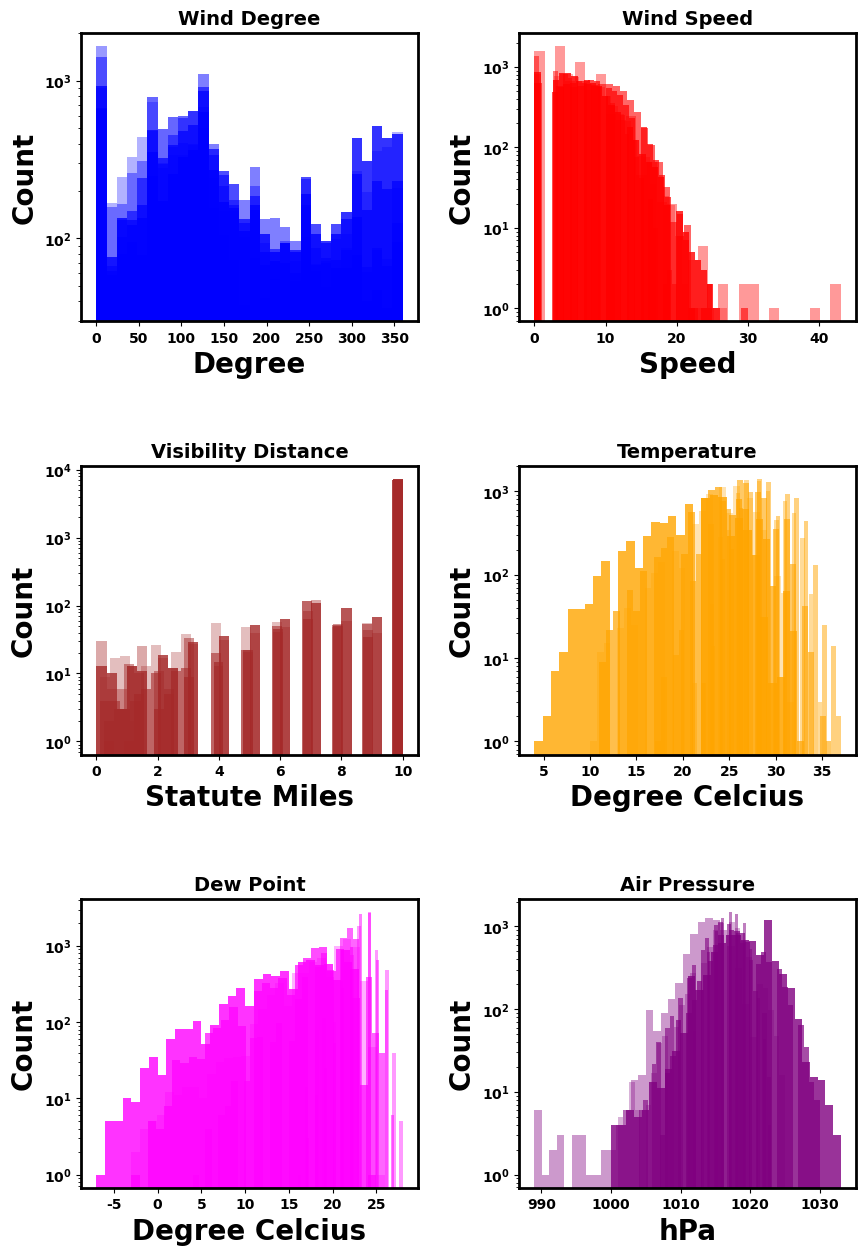

In [191]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
# Increase vertical spacing
fig.subplots_adjust(hspace=0.5,wspace=0.3)


axs[0,0].hist(df_by_month[1.0]['degree'],bins=30,color='blue',alpha =0.8);
axs[0,0].hist(df_by_month[3.0]['degree'],bins=30,color='blue',alpha =0.7);
axs[0,0].hist(df_by_month[5.0]['degree'],bins=30,color='blue',alpha =0.6);
axs[0,0].hist(df_by_month[7.0]['degree'],bins=30,color='blue',alpha =0.5);
axs[0,0].hist(df_by_month[9.0]['degree'],bins=30,color='blue',alpha =0.4);
axs[0,0].hist(df_by_month[11.0]['degree'],bins=30,color='blue',alpha =0.3);
axs[0,0].set_ylabel(r'Count')
axs[0,0].set_xlabel(r'Degree')
axs[0,0].set_title('Wind Degree', fontsize=14, fontweight='bold')
axs[0,0].set_yscale('log')
# print the means, etc on top right 

axs[0,1].hist(df_by_month[1.0]['speed'],bins=30,color='red',alpha =0.8);
axs[0,1].hist(df_by_month[3.0]['speed'],bins=30,color='red',alpha =0.7);
axs[0,1].hist(df_by_month[5.0]['speed'],bins=30,color='red',alpha =0.6);
axs[0,1].hist(df_by_month[7.0]['speed'],bins=30,color='red',alpha =0.5);
axs[0,1].hist(df_by_month[9.0]['speed'],bins=30,color='red',alpha =0.4);
axs[0,1].hist(df_by_month[11.0]['speed'],bins=30,color='red',alpha =0.3);
axs[0,1].set_ylabel(r'Count')
axs[0,1].set_xlabel(r'Speed')
axs[0,1].set_title('Wind Speed', fontsize=14, fontweight='bold')
axs[0,1].set_yscale('log')

axs[1,0].hist(df_by_month[1.0]['visibility'],bins=30,color='brown',alpha =0.8);
axs[1,0].hist(df_by_month[3.0]['visibility'],bins=30,color='brown',alpha =0.7);
axs[1,0].hist(df_by_month[5.0]['visibility'],bins=30,color='brown',alpha =0.6);
axs[1,0].hist(df_by_month[7.0]['visibility'],bins=30,color='brown',alpha =0.5);
axs[1,0].hist(df_by_month[9.0]['visibility'],bins=30,color='brown',alpha =0.4);
axs[1,0].hist(df_by_month[11.0]['visibility'],bins=30,color='brown',alpha =0.3);
axs[1,0].set_ylabel(r'Count')
axs[1,0].set_xlabel(r'Statute Miles')
axs[1,0].set_title('Visibility Distance', fontsize=14, fontweight='bold')
axs[1,0].set_yscale('log')


axs[1,1].hist(df_by_month[1.0]['temperature'],bins=30,color='orange',alpha =0.8);
axs[1,1].hist(df_by_month[3.0]['temperature'],bins=30,color='orange',alpha =0.7);
axs[1,1].hist(df_by_month[5.0]['temperature'],bins=30,color='orange',alpha =0.6);
axs[1,1].hist(df_by_month[7.0]['temperature'],bins=30,color='orange',alpha =0.5);
axs[1,1].hist(df_by_month[9.0]['temperature'],bins=30,color='orange',alpha =0.4);
axs[1,1].hist(df_by_month[11.0]['temperature'],bins=30,color='orange',alpha =0.3);
axs[1,1].set_ylabel(r'Count')
axs[1,1].set_xlabel(r'Degree Celcius')
axs[1,1].set_title('Temperature', fontsize=14, fontweight='bold')
axs[1,1].set_yscale('log')


axs[2,0].hist(df_by_month[1.0]['dew_data'],bins=30,color='magenta',alpha =0.8);
axs[2,0].hist(df_by_month[3.0]['dew_data'],bins=30,color='magenta',alpha =0.7);
axs[2,0].hist(df_by_month[5.0]['dew_data'],bins=30,color='magenta',alpha =0.6);
axs[2,0].hist(df_by_month[7.0]['dew_data'],bins=30,color='magenta',alpha =0.5);
axs[2,0].hist(df_by_month[9.0]['dew_data'],bins=30,color='magenta',alpha =0.4);
axs[2,0].hist(df_by_month[11.0]['dew_data'],bins=30,color='magenta',alpha =0.3);
axs[2,0].set_ylabel(r'Count')
axs[2,0].set_xlabel(r'Degree Celcius')
axs[2,0].set_title('Dew Point', fontsize=14, fontweight='bold')
axs[2,0].set_yscale('log')

axs[2,1].hist(df_by_month[1.0]['air_pressure'],bins=30,color='purple',alpha =0.8);
axs[2,1].hist(df_by_month[3.0]['air_pressure'],bins=30,color='purple',alpha =0.7);
axs[2,1].hist(df_by_month[5.0]['air_pressure'],bins=30,color='purple',alpha =0.6);
axs[2,1].hist(df_by_month[7.0]['air_pressure'],bins=30,color='purple',alpha =0.5);
axs[2,1].hist(df_by_month[9.0]['air_pressure'],bins=30,color='purple',alpha =0.4);
axs[2,1].hist(df_by_month[11.0]['air_pressure'],bins=30,color='purple',alpha =0.3);
axs[2,1].set_ylabel(r'Count')
axs[2,1].set_xlabel(r'hPa')
axs[2,1].set_title('Air Pressure', fontsize=14, fontweight='bold')
axs[2,1].set_yscale('log')



fig.savefig('../results/datadistribution_by_month.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

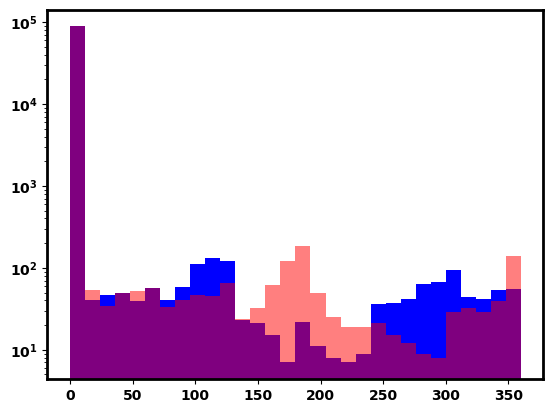

In [343]:
plt.hist(METAR_df_core['wind_min_var'],bins=30,color='blue')
plt.hist(METAR_df_core['wind_max_var'],bins=30,color='red',alpha=0.5)
plt.yscale('log');

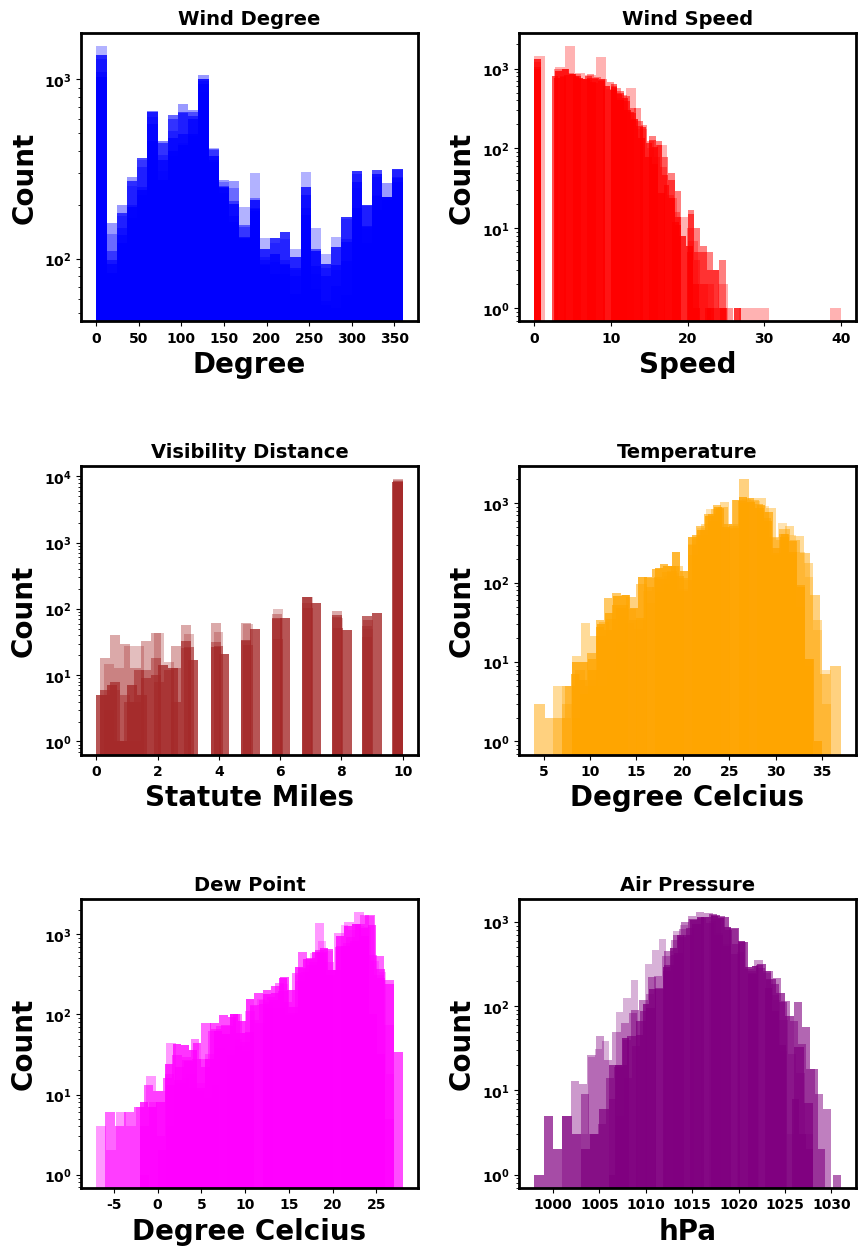

In [193]:

fig, axs = plt.subplots(3, 2, figsize=(10, 15))
# Increase vertical spacing
fig.subplots_adjust(hspace=0.5,wspace=0.3)


axs[0,0].hist(df_by_year[2014.0]['degree'],bins=30,color='blue',alpha =0.8);
axs[0,0].hist(df_by_year[2016.0]['degree'],bins=30,color='blue',alpha =0.7);
axs[0,0].hist(df_by_year[2018.0]['degree'],bins=30,color='blue',alpha =0.6);
axs[0,0].hist(df_by_year[2020.0]['degree'],bins=30,color='blue',alpha =0.5);
axs[0,0].hist(df_by_year[2022.0]['degree'],bins=30,color='blue',alpha =0.4);
axs[0,0].hist(df_by_year[2023.0]['degree'],bins=30,color='blue',alpha =0.3);
axs[0,0].set_ylabel(r'Count')
axs[0,0].set_xlabel(r'Degree')
axs[0,0].set_title('Wind Degree', fontsize=14, fontweight='bold')
axs[0,0].set_yscale('log')
# print the means, etc on top right 

axs[0,1].hist(df_by_year[2014.0]['speed'],bins=30,color='red',alpha =0.8);
axs[0,1].hist(df_by_year[2016.0]['speed'],bins=30,color='red',alpha =0.7);
axs[0,1].hist(df_by_year[2018.0]['speed'],bins=30,color='red',alpha =0.6);
axs[0,1].hist(df_by_year[2020.0]['speed'],bins=30,color='red',alpha =0.5);
axs[0,1].hist(df_by_year[2022.0]['speed'],bins=30,color='red',alpha =0.4);
axs[0,1].hist(df_by_year[2023.0]['speed'],bins=30,color='red',alpha =0.3);
axs[0,1].set_ylabel(r'Count')
axs[0,1].set_xlabel(r'Speed')
axs[0,1].set_title('Wind Speed', fontsize=14, fontweight='bold')
axs[0,1].set_yscale('log')

axs[1,0].hist(df_by_year[2014.0]['visibility'],bins=30,color='brown',alpha =0.8);
axs[1,0].hist(df_by_year[2016.0]['visibility'],bins=30,color='brown',alpha =0.7);
axs[1,0].hist(df_by_year[2018.0]['visibility'],bins=30,color='brown',alpha =0.6);
axs[1,0].hist(df_by_year[2020.0]['visibility'],bins=30,color='brown',alpha =0.5);
axs[1,0].hist(df_by_year[2022.0]['visibility'],bins=30,color='brown',alpha =0.4);
axs[1,0].hist(df_by_year[2023.0]['visibility'],bins=30,color='brown',alpha =0.3);
axs[1,0].set_ylabel(r'Count')
axs[1,0].set_xlabel(r'Statute Miles')
axs[1,0].set_title('Visibility Distance', fontsize=14, fontweight='bold')
axs[1,0].set_yscale('log')


axs[1,1].hist(df_by_year[2014.0]['temperature'],bins=30,color='orange',alpha =0.8);
axs[1,1].hist(df_by_year[2016.0]['temperature'],bins=30,color='orange',alpha =0.7);
axs[1,1].hist(df_by_year[2018.0]['temperature'],bins=30,color='orange',alpha =0.6);
axs[1,1].hist(df_by_year[2020.0]['temperature'],bins=30,color='orange',alpha =0.5);
axs[1,1].hist(df_by_year[2022.0]['temperature'],bins=30,color='orange',alpha =0.4);
axs[1,1].hist(df_by_year[2023.0]['temperature'],bins=30,color='orange',alpha =0.3);
axs[1,1].set_ylabel(r'Count')
axs[1,1].set_xlabel(r'Degree Celcius')
axs[1,1].set_title('Temperature', fontsize=14, fontweight='bold')
axs[1,1].set_yscale('log')


axs[2,0].hist(df_by_year[2014.0]['dew_data'],bins=30,color='magenta',alpha =0.8);
axs[2,0].hist(df_by_year[2016.0]['dew_data'],bins=30,color='magenta',alpha =0.7);
axs[2,0].hist(df_by_year[2018.0]['dew_data'],bins=30,color='magenta',alpha =0.6);
axs[2,0].hist(df_by_year[2020.0]['dew_data'],bins=30,color='magenta',alpha =0.5);
axs[2,0].hist(df_by_year[2022.0]['dew_data'],bins=30,color='magenta',alpha =0.4);
axs[2,0].hist(df_by_year[2023.0]['dew_data'],bins=30,color='magenta',alpha =0.3);
axs[2,0].set_ylabel(r'Count')
axs[2,0].set_xlabel(r'Degree Celcius')
axs[2,0].set_title('Dew Point', fontsize=14, fontweight='bold')
axs[2,0].set_yscale('log')

axs[2,1].hist(df_by_year[2014.0]['air_pressure'],bins=30,color='purple',alpha =0.8);
axs[2,1].hist(df_by_year[2016.0]['air_pressure'],bins=30,color='purple',alpha =0.7);
axs[2,1].hist(df_by_year[2018.0]['air_pressure'],bins=30,color='purple',alpha =0.6);
axs[2,1].hist(df_by_year[2020.0]['air_pressure'],bins=30,color='purple',alpha =0.5);
axs[2,1].hist(df_by_year[2022.0]['air_pressure'],bins=30,color='purple',alpha =0.4);
axs[2,1].hist(df_by_year[2023.0]['air_pressure'],bins=30,color='purple',alpha =0.3);
axs[2,1].set_ylabel(r'Count')
axs[2,1].set_xlabel(r'hPa')
axs[2,1].set_title('Air Pressure', fontsize=14, fontweight='bold')
axs[2,1].set_yscale('log')



fig.savefig('../results/datadistribution_by_year.png',dpi=300,
            bbox_inches='tight',transparent=False,facecolor='white')

# Data Preprocessing 2 

In [ ]:
# Create Remarks Collection for weather Conditions. '_remark' , '_weather_conditions'
# create table containing the dates , time , _remark, _weather_conditions

In [ ]:
# Maybe create "Weather Stability Factor" for each data points
# this can be based on rate of metric changes in the data for the past 12 hours 
# prior to the given data point (this give sense of what condition the data is)
# create averages of data based on each day (parsed data based on days and do averages)

# EDA Part 1

In [ ]:
# Analyse distribution of the cloud layers, statistics of data, correlation of data 
# for each essential data do more analysis 

In [41]:
import matplotlib.pyplot as plt

In [36]:
# Check on correlation between data to decide how long memory should be 

from statsmodels.graphics.tsaplots import plot_acf

In [45]:
degree_data =raw_METAR_data['wind_degrees']
speed_data = raw_METAR_data['wind_speed']
vis_data =raw_METAR_data['visibility_distance']
n_cloud_data = raw_METAR_data['n_cloud_layers']
cloud_1_height_data = pd.Series(raw_METAR_data['clouds_1_layer']['layer_1']['height'])
temperature_data =raw_METAR_data['temperature']
dew_data =raw_METAR_data['dew']
air_pressure_data =raw_METAR_data['air_pressure']

In [50]:
cloud_2_height_data1 = pd.Series(raw_METAR_data['clouds_2_layer']['layer_1']['height'])
cloud_2_height_data2 = pd.Series(raw_METAR_data['clouds_2_layer']['layer_2']['height'])

cloud_3_height_data1 = pd.Series(raw_METAR_data['clouds_3_layer']['layer_1']['height'])
cloud_3_height_data2 = pd.Series(raw_METAR_data['clouds_3_layer']['layer_2']['height'])
cloud_3_height_data3 = pd.Series(raw_METAR_data['clouds_3_layer']['layer_3']['height'])

cloud_4_height_data1 = pd.Series(raw_METAR_data['clouds_4_layer']['layer_1']['height'])
cloud_4_height_data2 = pd.Series(raw_METAR_data['clouds_4_layer']['layer_2']['height'])
cloud_4_height_data3 = pd.Series(raw_METAR_data['clouds_4_layer']['layer_3']['height'])
cloud_4_height_data4 = pd.Series(raw_METAR_data['clouds_4_layer']['layer_4']['height'])

In [54]:
cloud_5_height_data1 = pd.Series(raw_METAR_data['clouds_5_layer']['layer_1']['height'])
cloud_5_height_data2 = pd.Series(raw_METAR_data['clouds_5_layer']['layer_2']['height'])
cloud_5_height_data3 = pd.Series(raw_METAR_data['clouds_5_layer']['layer_3']['height'])
cloud_5_height_data4 = pd.Series(raw_METAR_data['clouds_5_layer']['layer_4']['height'])
cloud_5_height_data5 = pd.Series(raw_METAR_data['clouds_5_layer']['layer_5']['height'])

cloud_6_height_data1 = pd.Series(raw_METAR_data['clouds_6_layer']['layer_1']['height'])
cloud_6_height_data2 = pd.Series(raw_METAR_data['clouds_6_layer']['layer_2']['height'])
cloud_6_height_data3 = pd.Series(raw_METAR_data['clouds_6_layer']['layer_3']['height'])
cloud_6_height_data4 = pd.Series(raw_METAR_data['clouds_6_layer']['layer_4']['height'])
cloud_6_height_data5 = pd.Series(raw_METAR_data['clouds_6_layer']['layer_5']['height'])
cloud_6_height_data6 = pd.Series(raw_METAR_data['clouds_6_layer']['layer_6']['height'])

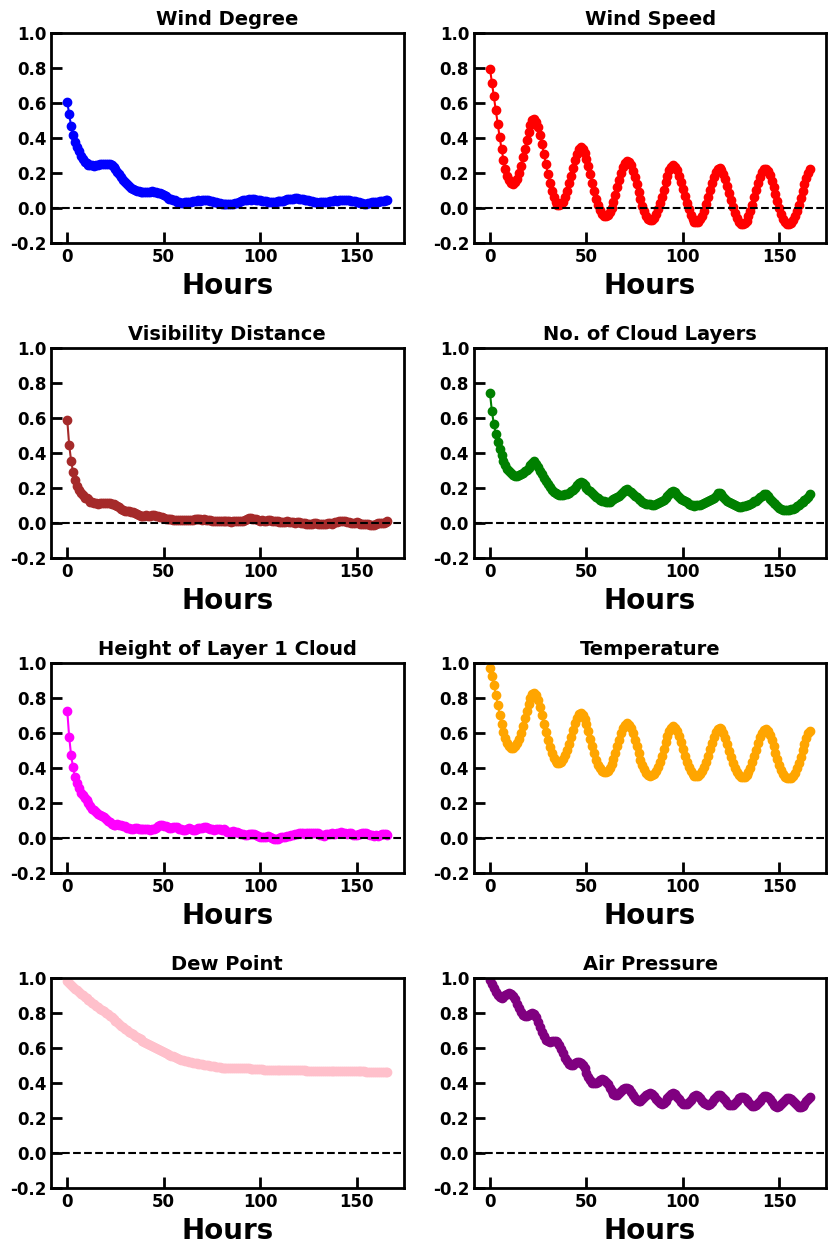

In [65]:
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
# Increase vertical spacing
fig.subplots_adjust(hspace=0.5)

max_lag = 168

data = degree_data
autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]
axs[0,0].plot(autocorrelations, marker='o', c = 'b')
axs[0,0].set_title('Wind Degree', fontsize=14, fontweight='bold')
axs[0,0].set_ylim(-0.2,1)
axs[0,0].set_xlabel('Hours')
axs[0,0].axhline(0, color='k', linestyle='--')


data = speed_data
autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]
axs[0,1].plot(autocorrelations, marker='o', c = 'r')
axs[0,1].set_title('Wind Speed', fontsize=14, fontweight='bold')
axs[0,1].set_ylim(-0.2,1)
axs[0,1].set_xlabel('Hours')
axs[0,1].axhline(0, color='k', linestyle='--')


data = vis_data
autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]
axs[1,0].plot(autocorrelations, marker='o', c = 'brown')
axs[1,0].set_title('Visibility Distance', fontsize=14, fontweight='bold')
axs[1,0].set_ylim(-0.2,1)
axs[1,0].set_xlabel('Hours')
axs[1,0].axhline(0, color='k', linestyle='--')


data = n_cloud_data
autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]
axs[1,1].plot(autocorrelations, marker='o', c = 'green')
axs[1,1].set_title('No. of Cloud Layers', fontsize=14, fontweight='bold')
axs[1,1].set_ylim(-0.2,1)
axs[1,1].set_xlabel('Hours')
axs[1,1].axhline(0, color='k', linestyle='--')


data = cloud_1_height_data
autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]
axs[2,0].plot(autocorrelations, marker='o', c = 'magenta')
axs[2,0].set_title('Height of Layer 1 Cloud', fontsize=14, fontweight='bold')
axs[2,0].set_ylim(-0.2,1)
axs[2,0].set_xlabel('Hours')
axs[2,0].axhline(0, color='k', linestyle='--')


data = temperature_data
autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]
axs[2,1].plot(autocorrelations, marker='o', c = 'orange')
axs[2,1].set_title('Temperature', fontsize=14, fontweight='bold')
axs[2,1].set_ylim(-0.2,1)
axs[2,1].set_xlabel('Hours')
axs[2,1].axhline(0, color='k', linestyle='--')

data = dew_data
autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]
axs[3,0].plot(autocorrelations, marker='o', c = 'pink')
axs[3,0].set_title('Dew Point', fontsize=14, fontweight='bold')
axs[3,0].set_ylim(-0.2,1)
axs[3,0].set_xlabel('Hours')
axs[3,0].axhline(0, color='k', linestyle='--')


data = air_pressure_data
autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]
axs[3,1].plot(autocorrelations, marker='o', c = 'purple')
axs[3,1].set_title('Air Pressure', fontsize=14, fontweight='bold')
axs[3,1].set_ylim(-0.2,1)
axs[3,1].set_xlabel('Hours')
axs[3,1].axhline(0, color='k', linestyle='--')

axs[0,0].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[0,1].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[1,0].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[1,1].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[2,0].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[2,1].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[3,0].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[3,1].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)

fig.savefig('../results/Autocorrelation.png', dpi=300)

### Correlation between height of different cloud layers 

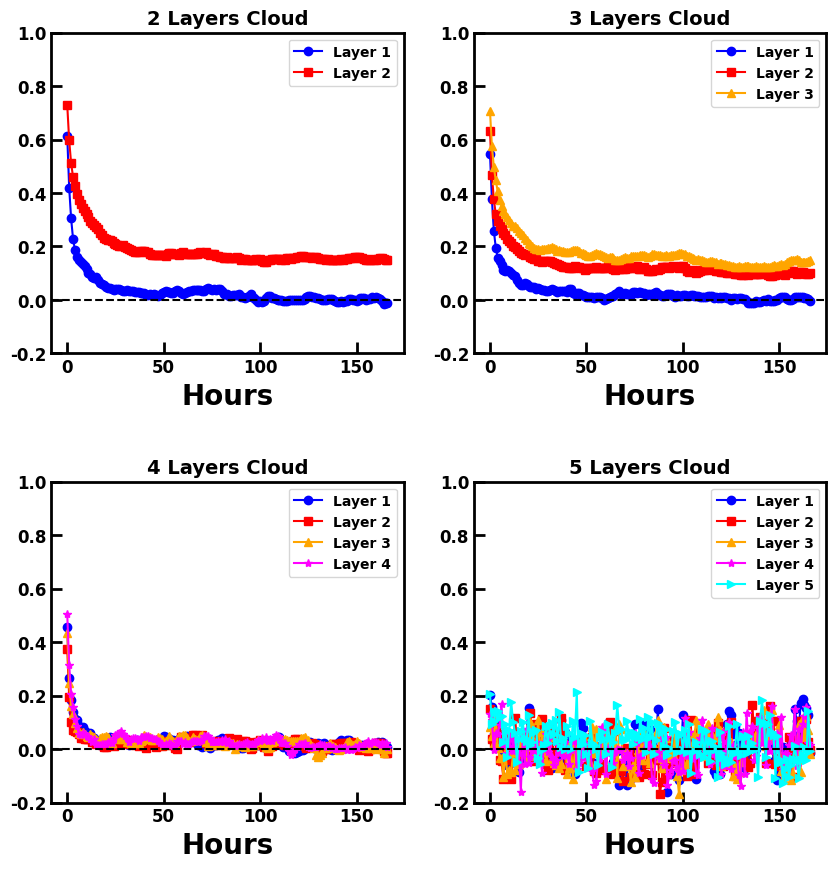

In [64]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# Increase vertical spacing
fig.subplots_adjust(hspace=0.4)

max_lag = 168

# data = cloud_1_height_data 
# autocorrelations = [data.autocorr(lag=i) for i in range(1, max_lag)]

# axs[0,0].plot(autocorrelations, marker='o', c = 'b',label ='Layer 1')
# axs[0,0].set_title('1 Layer Cloud')
# axs[0,0].set_ylim(-0.2,1)
# axs[0,0].set_xlabel('Hours')
# axs[0,0].axhline(0, color='k', linestyle='--')
# axs[0,0].legend()

data = cloud_2_height_data1 
autocorrelations1 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_2_height_data2
autocorrelations2 = [data.autocorr(lag=i) for i in range(1, max_lag)]

axs[0,0].plot(autocorrelations1, marker='o', c = 'b',label ='Layer 1')
axs[0,0].plot(autocorrelations2, marker='s', c = 'r',label ='Layer 2')
axs[0,0].set_title('2 Layers Cloud', fontsize=14, fontweight='bold')
axs[0,0].set_ylim(-0.2,1)
axs[0,0].set_xlabel('Hours')
axs[0,0].axhline(0, color='k', linestyle='--')
axs[0,0].legend()


data = cloud_3_height_data1 
autocorrelations1 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_3_height_data2
autocorrelations2 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_3_height_data3
autocorrelations3 = [data.autocorr(lag=i) for i in range(1, max_lag)]

axs[0,1].plot(autocorrelations1, marker='o', c = 'b',label ='Layer 1')
axs[0,1].plot(autocorrelations2, marker='s', c = 'r',label ='Layer 2')
axs[0,1].plot(autocorrelations3, marker='^', c = 'orange',label ='Layer 3')
axs[0,1].set_title('3 Layers Cloud', fontsize=14, fontweight='bold')
axs[0,1].set_ylim(-0.2,1)
axs[0,1].set_xlabel('Hours')
axs[0,1].axhline(0, color='k', linestyle='--')
axs[0,1].legend()



data = cloud_4_height_data1 
autocorrelations1 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_4_height_data2
autocorrelations2 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_4_height_data3
autocorrelations3 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_4_height_data4
autocorrelations4 = [data.autocorr(lag=i) for i in range(1, max_lag)]

axs[1,0].plot(autocorrelations1, marker='o', c = 'b',label ='Layer 1')
axs[1,0].plot(autocorrelations2, marker='s', c = 'r',label ='Layer 2')
axs[1,0].plot(autocorrelations3, marker='^', c = 'orange',label ='Layer 3')
axs[1,0].plot(autocorrelations4, marker='*', c = 'magenta',label ='Layer 4')
axs[1,0].set_title('4 Layers Cloud', fontsize=14, fontweight='bold')
axs[1,0].set_ylim(-0.2,1)
axs[1,0].set_xlabel('Hours')
axs[1,0].axhline(0, color='k', linestyle='--')
axs[1,0].legend()


data = cloud_5_height_data1 
autocorrelations1 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_5_height_data2
autocorrelations2 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_5_height_data3
autocorrelations3 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_5_height_data4
autocorrelations4 = [data.autocorr(lag=i) for i in range(1, max_lag)]

data = cloud_5_height_data5
autocorrelations5 = [data.autocorr(lag=i) for i in range(1, max_lag)]

axs[1,1].plot(autocorrelations1, marker='o', c = 'b',label ='Layer 1')
axs[1,1].plot(autocorrelations2, marker='s', c = 'r',label ='Layer 2')
axs[1,1].plot(autocorrelations3, marker='^', c = 'orange',label ='Layer 3')
axs[1,1].plot(autocorrelations4, marker='*', c = 'magenta',label ='Layer 4')
axs[1,1].plot(autocorrelations5, marker='>', c = 'cyan',label ='Layer 5')
axs[1,1].set_title('5 Layers Cloud', fontsize=14, fontweight='bold')
axs[1,1].set_ylim(-0.2,1)
axs[1,1].set_xlabel('Hours')
axs[1,1].axhline(0, color='k', linestyle='--')
axs[1,1].legend()

axs[0,0].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[0,1].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[1,0].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)
axs[1,1].tick_params(direction='in',labelsize=12, length=tick_length, width=tick_width)

fig.savefig('../results/Cloud_Autocorrelation.png')

### Distribution of Data 

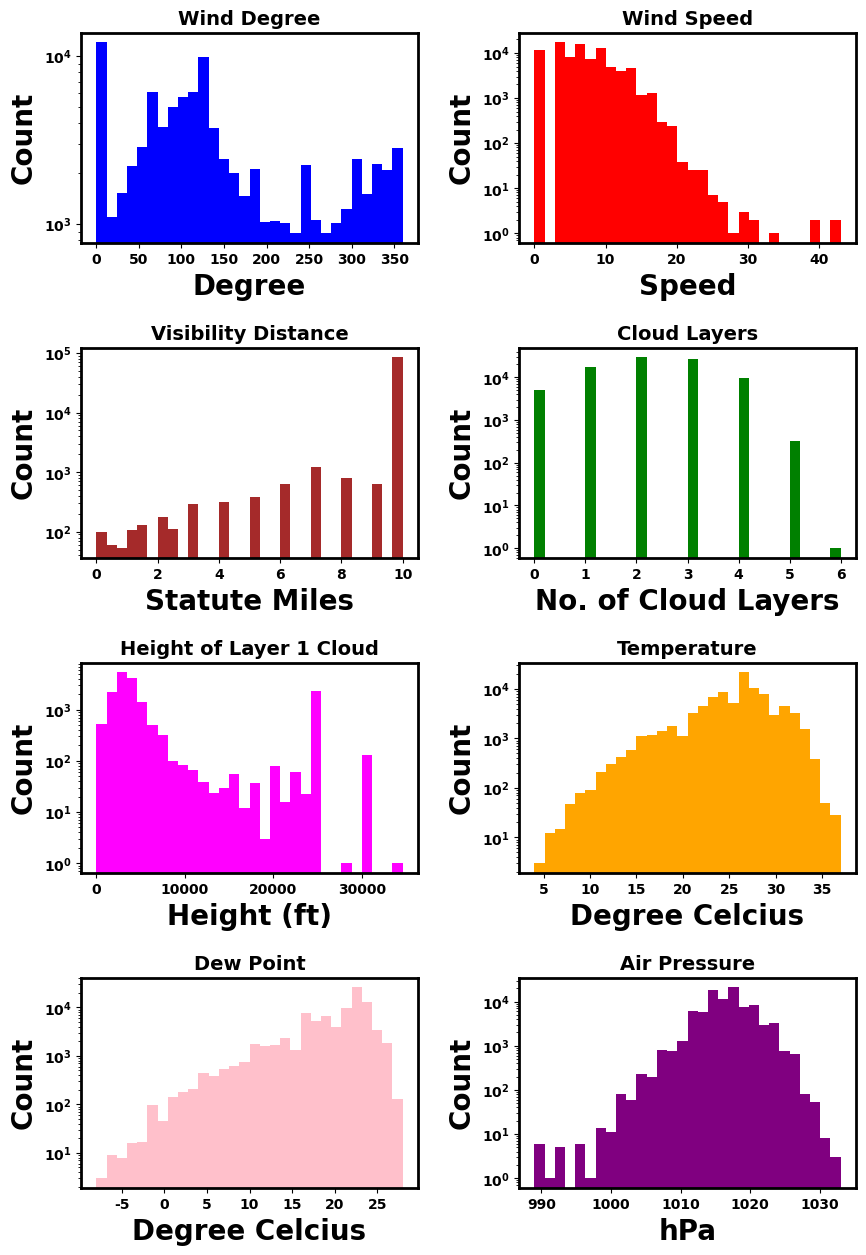

In [76]:

fig, axs = plt.subplots(4, 2, figsize=(10, 15))
# Increase vertical spacing
fig.subplots_adjust(hspace=0.5,wspace=0.3)


axs[0,0].hist(degree_data,bins=30,color='b',alpha =1);
axs[0,0].set_ylabel(r'Count')
axs[0,0].set_xlabel(r'Degree')
axs[0,0].set_title('Wind Degree', fontsize=14, fontweight='bold')
axs[0,0].set_yscale('log')
# print the means, etc on top right 

axs[0,1].hist(speed_data,bins=30,color='r',alpha =1);
axs[0,1].set_ylabel(r'Count')
axs[0,1].set_xlabel(r'Speed')
axs[0,1].set_title('Wind Speed', fontsize=14, fontweight='bold')
axs[0,1].set_yscale('log')

axs[1,0].hist(vis_data,bins=30,color='brown',alpha =1);
axs[1,0].set_ylabel(r'Count')
axs[1,0].set_xlabel(r'Statute Miles')
axs[1,0].set_title('Visibility Distance', fontsize=14, fontweight='bold')
axs[1,0].set_yscale('log')

axs[1,1].hist(n_cloud_data,bins=30,color='green',alpha =1);
axs[1,1].set_ylabel(r'Count')
axs[1,1].set_xlabel(r'No. of Cloud Layers')
axs[1,1].set_title('Cloud Layers', fontsize=14, fontweight='bold')
axs[1,1].set_yscale('log')

axs[2,0].hist(cloud_1_height_data,bins=30,color='magenta',alpha =1);
axs[2,0].set_ylabel(r'Count')
axs[2,0].set_xlabel(r'Height (ft)')
axs[2,0].set_title('Height of Layer 1 Cloud', fontsize=14, fontweight='bold')
axs[2,0].set_yscale('log')
axs[2,0].set_xticks([0, 10000, 20000, 30000])

axs[2,1].hist(temperature_data,bins=30,color='orange',alpha =1);
axs[2,1].set_ylabel(r'Count')
axs[2,1].set_xlabel(r'Degree Celcius')
axs[2,1].set_title('Temperature', fontsize=14, fontweight='bold')
axs[2,1].set_yscale('log')


axs[3,0].hist(dew_data,bins=30,color='pink',alpha =1);
axs[3,0].set_ylabel(r'Count')
axs[3,0].set_xlabel(r'Degree Celcius')
axs[3,0].set_title('Dew Point', fontsize=14, fontweight='bold')
axs[3,0].set_yscale('log')

axs[3,1].hist(air_pressure_data,bins=30,color='purple',alpha =1);
axs[3,1].set_ylabel(r'Count')
axs[3,1].set_xlabel(r'hPa')
axs[3,1].set_title('Air Pressure', fontsize=14, fontweight='bold')
axs[3,1].set_yscale('log')




fig.savefig('../results/datadistribution_1.png')

# EDA Part 2 

In [ ]:
# based on the collection of remarks, create a tokenized database and ask PrivateGPT or other Agent
# To make quick summary of weather events in each quarter of the years included in the dataset. 

In [ ]:
# Month and Year Variation 

In [102]:
# Plot Cloud Type distribution or clustering 
# get all cloud data from layer 1 to 5 and combine into one
cloud_type_list = []
cloud_type_dict = {}
for i in range(1,6):
    cloud_type = raw_METAR_data[f'clouds_{i}_layer'][f'layer_{i}']['quantity_num']
    new_data = {i:cloud_type}
    cloud_type_dict.update(new_data)
    cloud_type_list.extend(cloud_type)

In [104]:
cloud_category_encoding = {'NSC':0, 'FEW': 1, 'SCT': 2, 'BKN':5, 'OVC':8}
cloud_category_decoding = {0:'NSC', 1:'FEW',2:'SCT', 5:'BKN', 8: 'OVC'}

In [85]:
cloud_category_decoding[0]

'NSC'

In [105]:
decoded_cloud_type_dict  = {}
for k in cloud_type_dict.keys() :
    my_cloud_type_list = cloud_type_dict[k]
    decoded_cloud_type_ind = []
    for a in my_cloud_type_list :
        b = cloud_category_decoding[a]
        decoded_cloud_type_ind.append(b)
    new_data = {k:decoded_cloud_type_ind}
    decoded_cloud_type_dict.update(new_data)

In [86]:
decoded_cloud_type  = []
for a in cloud_type_list :
    b = cloud_category_decoding[a]
    decoded_cloud_type.append(b)

In [264]:
cloud_type_series = pd.Series(cloud_type_list)

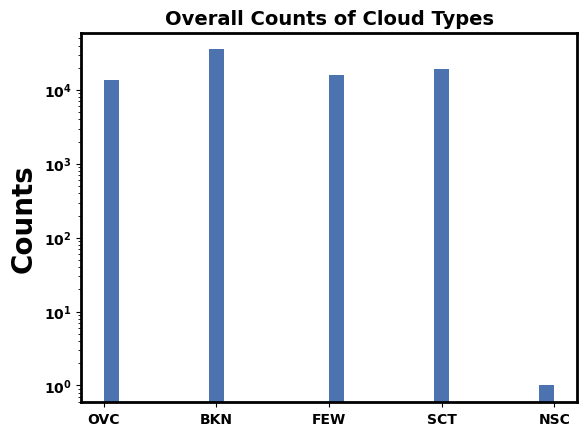

In [156]:
plt.hist( decoded_cloud_type,bins=30,color='b',alpha =1);
plt.yscale('log')
plt.title('Overall Counts of Cloud Types', fontsize=14, fontweight='bold')
plt.ylabel('Counts')
plt.savefig('../results/overall_cloud.png')

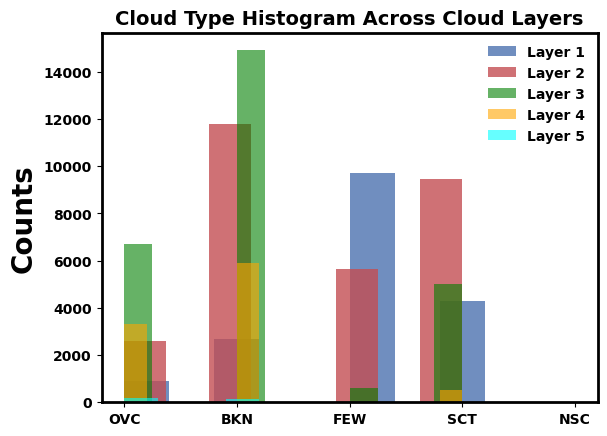

In [172]:
# Plot Stacked Cloud Dist based on Layers
data1 = decoded_cloud_type_dict[1]
data2 = decoded_cloud_type_dict[2]
data3 = decoded_cloud_type_dict[3]
data4 = decoded_cloud_type_dict[4]
data5 = decoded_cloud_type_dict[5]

# Creating bins
bins = 10
plt.hist( data1,bins=bins,color='b',alpha =0.8,label='Layer 1');
plt.hist( data2,bins=8,color='r',alpha =0.8,label='Layer 2');
plt.hist( data3,bins=12,color='green',alpha =0.6,label='Layer 3');
plt.hist( data4,bins=15,color='orange',alpha =0.6,label='Layer 4');
plt.hist( data5,bins=10,color='cyan',alpha =0.6,label='Layer 5');
# plt.yscale('log')
plt.ylabel('Counts')
plt.title('Cloud Type Histogram Across Cloud Layers', fontsize=14, fontweight='bold')
plt.legend(frameon=False);
plt.savefig('../results/cloud_type_dist.png',dpi=300,bbox_inches='tight',transparent=False,facecolor='white')

# Model Development

In [ ]:
# Display different analysis of using LSTM model, with different training size, and also with 
# different hyperparameters
# do this for all properties
# Do some form of optimization. 
# discuss good features or challenges faced. 
# analysis areas where the model can still be improved. 

In [ ]:
# We first choose a base hyperparameters to work with here called as hyperparameter set 1
# # hyperparameters = {
#         'n_units' : 50,'dropout_rate' : 0.2,'n_dense' : 1,'n_epochs' : 100,'n_batch' : 32,'LSTM_depth' : 3,'n_train' :1000,'n_test' : 200,
#         'window_size':p, 'scaling': 'MinMax'
#     }
# 1st is improvement with Number of Training Data 

In [ ]:
# as we are dealing with temporal data we first check the effect of sequence Length or the 
# number of window frames we used for our training. 
# we now check the effect of scaling the data, since the data are all positive values,
# we stick with the MinMax scaling using 0,1 range
# Working with temporal data, we incline to use the data of previous hours
# we check the effect of LSTM layers, by testing 2,3,4 layers respectively to see 
# dropout of 0.1, 0.2, 0.3 to check on effect of dropout on sensitivity, 
# create test for each cases. 
# Learning rate 


In [ ]:
# we want to analyze these data for different properties. , pick on the best and mix match them as 
# METAR_Model 1 Accurate on Wind 
# METAR_Model 2 Accurate on Cloud
# METAR_Model 3 Generally accurate for most 

# A Federated Result. 


In [ ]:
# Display Test Results for each properties

# Display also concrete prediction output based on 10 Randomly Sampled Data, and The predicted one, 
# provide a table

In [ ]:
# Benchmark of the 5 model set

In [58]:
# MAE test here

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
raw_METAR_data.keys()

dict_keys(['year', 'month', 'day', 'hour', 'minute', 'wind_speed', 'wind_direction', 'wind_gust', 'wind_degrees', 'wind_unit', 'wind_min_ver', 'wind_max_var', 'visibility_distance', 'visibility_min_dis', 'visibility_min_dir', 'clouds', 'n_cloud_layers', 'clouds_0_layer', 'clouds_1_layer', 'clouds_2_layer', 'clouds_3_layer', 'clouds_4_layer', 'clouds_5_layer', 'clouds_6_layer', 'temperature', 'dew', 'air_pressure', 'bool_wind_min_var', 'bool_wind_max_var', 'wind_mind_var'])

In [325]:
def preprocess_cloud_height(final_dict):
    """
    extract number of cloud height_for each layers
    if none then give zeros, so there must be 4 layers of cloud 
    The rest is ignored 
    """
    cloud_category_encoding = {'NSC':0, 'FEW': 1, 'SCT': 2, 'BKN':5, 'OVC':8}
    n_cloud_list = []
    cloud_1_list =[]
    cloud_2_list =[]
    cloud_3_list =[]
    cloud_4_list =[]
    cloud_1_type_list =[]
    cloud_2_type_list =[]
    cloud_3_type_list =[]
    cloud_4_type_list =[]
    for i in range(len(final_dict['clouds'])):
        n_cloud = final_dict['clouds'][i]
        n_cloud_len = len(n_cloud)
        if n_cloud_len == 0:
            cloud_1_list.append(0)
            cloud_2_list.append(0)
            cloud_3_list.append(0)
            cloud_4_list.append(0)
            
            cloud_1_type_list.append(0)
            cloud_2_type_list.append(0)
            cloud_3_type_list.append(0)
            cloud_4_type_list.append(0)
        elif n_cloud_len == 1:
            cloud_1 = n_cloud[0].height # this is the height of layer 1
            cloud_1_type = n_cloud[0].quantity
            cloud_1_type_num = cloud_category_encoding[cloud_1_type.value]
            cloud_1_list.append(cloud_1)
            cloud_1_type_list.append(cloud_1_type_num)
            cloud_2_list.append(0)
            cloud_3_list.append(0)
            cloud_4_list.append(0)
            cloud_2_type_list.append(0)
            cloud_3_type_list.append(0)
            cloud_4_type_list.append(0)
        elif n_cloud_len == 2:
            cloud_1 = n_cloud[0].height # this is the height of layer 1
            cloud_1_type = n_cloud[0].quantity
            cloud_1_type_num = cloud_category_encoding[cloud_1_type.value]
            cloud_1_list.append(cloud_1)
            cloud_1_type_list.append(cloud_1_type_num)
            
            cloud_2 = n_cloud[1].height # this is the height of layer 1
            cloud_2_type = n_cloud[1].quantity
            cloud_2_type_num = cloud_category_encoding[cloud_2_type.value]
            cloud_2_list.append(cloud_2)
            cloud_2_type_list.append(cloud_2_type_num)
            
            cloud_3_list.append(0)
            cloud_4_list.append(0)
            cloud_3_type_list.append(0)
            cloud_4_type_list.append(0)
        elif n_cloud_len == 3:
            cloud_1 = n_cloud[0].height # this is the height of layer 1
            cloud_1_type = n_cloud[0].quantity
            cloud_1_type_num = cloud_category_encoding[cloud_1_type.value]
            cloud_1_list.append(cloud_1)
            cloud_1_type_list.append(cloud_1_type_num)
            
            cloud_2 = n_cloud[1].height # this is the height of layer 1
            cloud_2_type = n_cloud[1].quantity
            cloud_2_type_num = cloud_category_encoding[cloud_2_type.value]
            cloud_2_list.append(cloud_2)
            cloud_2_type_list.append(cloud_2_type_num)
            
            cloud_3 = n_cloud[2].height # this is the height of layer 1
            cloud_3_type = n_cloud[2].quantity
            cloud_3_type_num = cloud_category_encoding[cloud_3_type.value]
            cloud_3_list.append(cloud_3)
            cloud_3_type_list.append(cloud_3_type_num)
            
            cloud_4_list.append(0)
            cloud_4_type_list.append(0)
        else :
            cloud_1 = n_cloud[0].height # this is the height of layer 1
            cloud_1_type = n_cloud[0].quantity
            cloud_1_type_num = cloud_category_encoding[cloud_1_type.value]
            cloud_1_list.append(cloud_1)
            cloud_1_type_list.append(cloud_1_type_num)
            
            cloud_2 = n_cloud[1].height # this is the height of layer 1
            cloud_2_type = n_cloud[1].quantity
            cloud_2_type_num = cloud_category_encoding[cloud_2_type.value]
            cloud_2_list.append(cloud_2)
            cloud_2_type_list.append(cloud_2_type_num)
            
            cloud_3 = n_cloud[2].height # this is the height of layer 1
            cloud_3_type = n_cloud[2].quantity
            cloud_3_type_num = cloud_category_encoding[cloud_3_type.value]
            cloud_3_list.append(cloud_3)
            cloud_3_type_list.append(cloud_3_type_num)
            
            cloud_4 = n_cloud[3].height # this is the height of layer 1
            cloud_4_type = n_cloud[3].quantity
            cloud_4_type_num = cloud_category_encoding[cloud_4_type.value]
            cloud_4_list.append(cloud_4)
            cloud_4_type_list.append(cloud_4_type_num)

        

        cloud_df = pd.DataFrame({'cloud_layer_1_height':cloud_1_list,
                    'cloud_layer_1_type':cloud_1_type_list,
                    'cloud_layer_2_height':cloud_2_list,
                    'cloud_layer_2_type':cloud_2_type_list,
                    'cloud_layer_3_height':cloud_3_list,
                    'cloud_layer_3_type':cloud_3_type_list,
                    'cloud_layer_4_height':cloud_4_list,
                    'cloud_layer_4_type':cloud_4_type_list,
                   })       
    return cloud_df

In [369]:
raw_METAR_DATA.keys()

NameError: name 'raw_METAR_DATA' is not defined